In [ ]:
#Llamar al dataloader
%run DataLoader.ipynb

In [ ]:
#Verificamos que el dataset no tenga ningúna fila que contenga la cadena de texto 'NaN'
#ya que vamos a tener que reemplazar los valores nulos por ese string para que el análisis sea bueno
len(dataset[(dataset.keyword.str.contains('NaN')) |\
        (dataset.location.str.contains('NaN')) |\
        (dataset.text.str.contains('NaN'))])

#Hacemos un fillna porque a la hora de hacer group by, buscar duplicados o hacer un pivot
#los NaN generan un mal resultado

grupo = dataset.fillna(value='NaN')

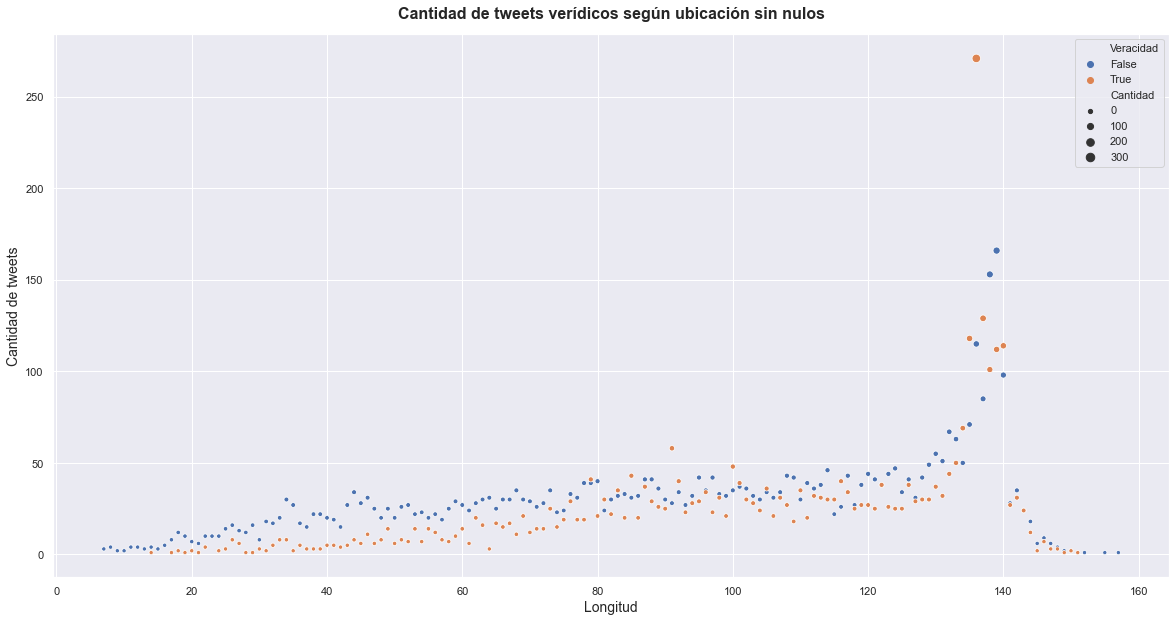

In [4]:
#Tweets por longitud y veracidad

grupo = dataset.groupby(['longitud', 'target']).agg({'target':['count']})
grupo.columns = ['Cantidad']

grupo = grupo.reset_index()
grupo = grupo.rename(columns={'target':'Veracidad'})


sns.set()
ax = sns.scatterplot(x = 'longitud', y = 'Cantidad', data = grupo, hue = 'Veracidad', size = 'Cantidad')
ax.set_title('Relación entre veracidad y longitud del tweet')
fig = ax.get_figure()
ax.set_ylabel('Cantidad de tweets',fontsize=14)
plt.xlabel("Longitud",fontsize=14)
ax.set_title('Cantidad de tweets verídicos según ubicación sin nulos',\
             fontsize=16,fontweight='bold', pad = 15)
plt.show()
# fig.savefig('figure.png')